In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [39]:
df = pd.read_csv("D:\\placement (2).csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [40]:
from sklearn.model_selection import train_test_split 

In [41]:
x = df.drop(['placed'],axis=1)
y = df['placed']

In [42]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)

In [43]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier

In [44]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()

In [45]:
eclf1 = VotingClassifier(estimators=[
    ('lr',clf1),('dt',clf2),('rf',clf3)],voting='hard')

In [46]:
eclf1.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())])

In [47]:
y_predict_1 = eclf1.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [49]:
accuracy_score(y_test,y_predict_1)

0.5

In [50]:
confusion_matrix(y_test,y_predict_1)

array([[79, 79],
       [71, 71]], dtype=int64)

In [51]:
eclf2 = VotingClassifier(estimators=[
    ('lr',clf1),('dt',clf2),('rf',clf3)],voting='soft')

In [52]:
eclf2.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [53]:
y_predict_2 = eclf2.predict(x_test)

In [54]:
accuracy_score(y_test,y_predict_2)

0.5166666666666667

In [55]:
confusion_matrix(y_test,y_predict_2)

array([[85, 73],
       [72, 70]], dtype=int64)

In [56]:
import seaborn as sns 
import scipy.stats as stats 

C:\Users\patel\AppData\Local\Temp\ipykernel_8400\581711667.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['placement_exam_marks'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\patel\AppData\Local\Temp\ipykernel_8400\581711667.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibili

<Axes: xlabel='cgpa', ylabel='Density'>

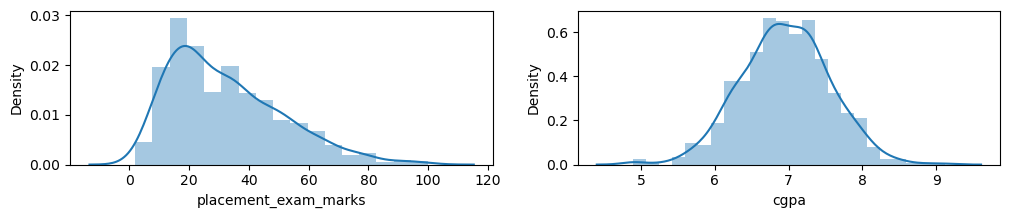

In [57]:
plt.figure(figsize=(12,2))
plt.subplot(121)
sns.distplot(x_train['placement_exam_marks'])

plt.subplot(122)
sns.distplot(x_train['cgpa'])

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [59]:
trf1 = ColumnTransformer(transformers=[
    ('tnf1',FunctionTransformer(np.log1p),['placement_exam_marks'])
],remainder='passthrough')

In [60]:
x_train_trans = trf1.fit_transform(x_train)

In [61]:
x_test_trans = trf1.transform(x_test)

In [62]:
eclf1.fit(x_train_trans,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())])

In [67]:
y_predict_3 = eclf1.predict(x_test_trans)

In [68]:
accuracy_score(y_test,y_predict_3)

0.4866666666666667

In [69]:
confusion_matrix(y_test,y_predict_3)

array([[80, 78],
       [76, 66]], dtype=int64)

In [70]:
eclf2.fit(x_train_trans,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [71]:
y_predict_4 = eclf2.predict(x_test_trans)

In [72]:
accuracy_score(y_test,y_predict_4)

0.49

In [73]:
confusion_matrix(y_test,y_predict_4)

array([[82, 76],
       [77, 65]], dtype=int64)